In [ ]:
! pip install highlight_text adjustText

In [ ]:
import pandas as pd
import urllib
import os
import seaborn as sns
import scipy.stats as stats
from PIL import Image
from highlight_text import ax_text,fig_text
import matplotlib.ticker as ticker
import matplotlib.patheffects as path_effects
import matplotlib.font_manager as fm
from highlight_text import fig_text, ax_text
from adjustText import adjust_text
from matplotlib.colors import LinearSegmentedColormap, Normalize
from matplotlib import cm

In [ ]:
font_path = "/content/assets/fonts"
for x in os.listdir(font_path):
    for y in os.listdir(f"{font_path}/{x}"):
        if y.split(".")[-1] == "ttf":
            fm.fontManager.addfont(f"{font_path}/{x}/{y}")
            try:
                fm.FontProperties(weight=y.split("-")[-1].split(".")[0].lower(), fname=y.split("-")[0])
            except Exception:
                continue

#plt.style.use("../assets/stylesheets/soc_base.mplstyle")
plt.rcParams['font.family'] = 'Karla'

In [ ]:
df=pd.read_html("https://fbref.com/en/comps/Big5/keepers/players/Big-5-European-Leagues-Stats")[0]

In [ ]:
list_cols=df.columns
columns_=[]
for i in list_cols:
    columns_.append(i[-1])
df.columns=columns_

In [ ]:
df=df.set_index("Rk")

In [ ]:
df_gk=df[["Player","Comp","Starts","Saves","Save%","Min","90s","GA","SoTA"]]
df_gk=df_gk[df_gk["Starts"]!="Starts"]
df_gk["90s"]=df_gk["90s"].astype("f")
df_gk["Starts"]=df_gk["Starts"].astype("f")
df_gk["Saves"]=df_gk["Saves"].astype("f")
df_gk["Save%"]=df_gk["Save%"].astype("f")
df_gk["GA"]=df_gk["GA"].astype("f")
df_gk["SoTA"]=df_gk["SoTA"].astype("f")
df_gk.columns=['Player', 'Comp','Starts', 'Saves', 'Save%', 'pk Save%',"Min","90s","GA","SoTA"]
df_gk.drop("pk Save%",axis=1,inplace=True)

In [ ]:
df_gk["Saves per 90"]=df_gk["Saves"]/df_gk["90s"]

In [ ]:
def clean_league(league):
    return " ".join(league.split(" ")[1:])

In [ ]:
df_gk["Comp"]=df_gk["Comp"].apply(clean_league)

In [ ]:
df_gk=df_gk[df_gk["Starts"]>18]

In [ ]:
top_gks=["Schmeichel","Pope","Patricio","Ramsdale","Alisson","Oblak","Ederson","Arizzabalaga","de Gea","Onana","Maignan","Donnarumma","Sommer","Martínez"]

In [ ]:
def clean_player(player):
  player_split=player.split(" ")
  if len(player_split)==1:
    return player
  else:
    return " ".join(player_split[1:])

df_gk["Player"]=df_gk["Player"].apply(clean_player)

In [ ]:
def annotate_starts(starts):
  if starts>38:
    return True
  return False
def annotate_ga(ga):
  if ga<43:
    return True
  return False

def annotate_saves(saves):
  if saves>125:
    return True
  elif saves<30:
      return True
  else:
    return False
def annotate_success_rate(rate):
  if rate>=78:
    return True

  elif rate<60:
    return True
  return False

df_gk['annotated']= df_gk["Save%"].apply(annotate_success_rate) | df_gk["Saves"].apply(annotate_saves) | (df_gk["Player"].isin(top_gks)) #| (df_gk["Starts"].apply(annotate_starts))
print(df_gk["annotated"].value_counts())
#df_gk["annotated"]=df_gk["annotated"] | df_gk["Starts"].apply(annotate_starts)

False    67
True     29
Name: annotated, dtype: int64


In [ ]:
import matplotlib.pyplot as plt

In [ ]:
layout = [["header"]*15,
          ["scatterplot"] * 15,
          ["scatterplot"] * 15,
          ["scatterplot"] * 15,
          ["scatterplot"] * 15,
          ["scatterplot"] * 15,
          ["scatterplot"] * 15,
          ["scatterplot"] * 15,
          ["scatterplot"] * 15,
          ]

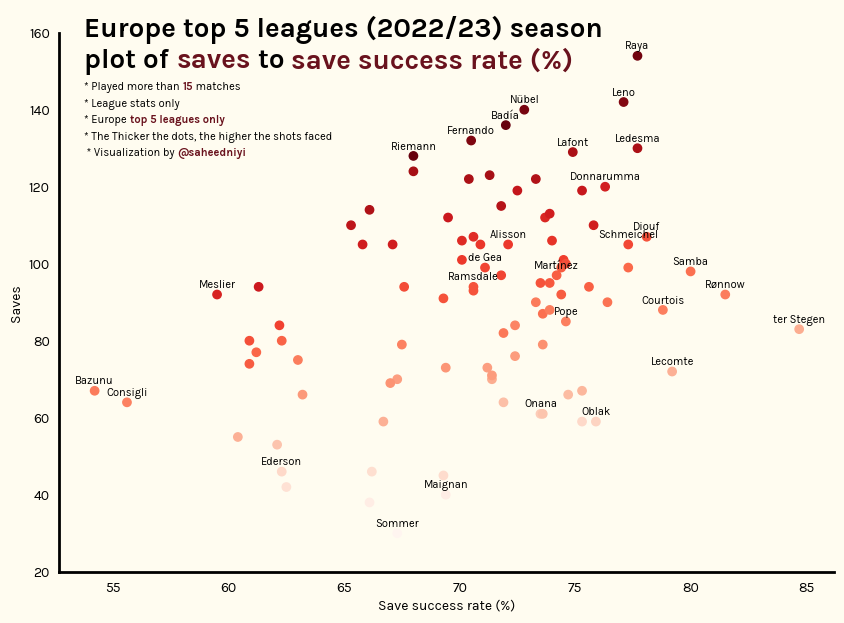

In [ ]:
fig=plt.figure(figsize=(10,7),facecolor="#fffcf0")
ax=plt.subplot()#subplot_mosaic(layout)

#scatter plot
ax.scatter(df_gk["Save%"],df_gk["Saves"]
           ,c=df_gk["SoTA"],cmap="Reds")
ax.set_ylim(20,160)
#ax.set_xlim(0,100)
ax.set_facecolor("#fffcf0")

ax.set_ylabel('Saves')
ax.set_xlabel('Save success rate (%)')
ax.spines["top"].set(visible=False)
ax.spines["right"].set(visible=False)
ax.spines["left"].set(linewidth=2)
ax.spines["bottom"].set(linewidth=2)

#xlabel
ax_dict["header"].set_facecolor("#fffcf0")
ax_dict["header"].axis("off")

ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')

#Annotate
fig_text(
    x = 0.15, y = 0.82,
    s = "Europe top 5 leagues (2022/23) season\nplot of <saves> to <save success rate (%)>",
    va = "bottom", ha = "left",
    highlight_textprops = [
        {"color": "#69121d", "weight": "bold"},
        {"color":"#69121d", "weight": "bold"}
    ],
    fontsize = 20, color = "black", weight = "bold"
)

#
fig_text(
    x = 0.15, y = 0.7,
    s = "* Played more than <15> matches\n* League stats only\n* Europe <top 5 leagues only>\n* The Thicker the dots, the higher the shots faced\n * Visualization by <@saheedniyi>",
    va = "bottom", ha = "left",
    highlight_textprops = [
        {"color": "#69121d", "weight": "bold"},
        {"color":"#69121d", "weight": "bold"},
        {"color": "#69121d", "weight": "bold"},
    ],
    fontsize = 8, color = "black"
)


for index,player in enumerate(df_gk["Player"]):
  x=df_gk["Save%"].iloc[index]
  y=df_gk["Saves"].iloc[index]
  annotated=df_gk["annotated"].iloc[index]

  if annotated:
    ax.annotate(
        xy=(x,y),
        xytext=(0,5),
        textcoords = "offset points",
        text=player,
        ha='center',
        size = 8,

    )